In [1]:
import time
import datetime as dt

def epoch_to_millis(epoch):
    
    datetime_time = dt.datetime.fromtimestamp(epoch)
    s = (datetime_time - dt.datetime(1970, 1, 1)).total_seconds()-3600
               
    return s
    

In [2]:
#import e parsing file di log
import pandas as pd



def start(path):
    
    file = open(path, 'r')
    Lines = file.readlines()
    
    return Lines

def rmse_distance(Lines):
    
    coppie = []

    for line in Lines:
        
        if 'COUPLE(N_ITER,DISTANCE RMSE)' in line:
            split = line.split(':')
            s = split[3].replace('[','')
            s = s.replace('(','')
            s = s.replace(')','')
            s = s.replace(']','')
            s = s.split(',')
            a = int(s[0])
            b = float(s[1])
            coppie.append((a,b))          
        
    return coppie


def execution_time_gurobi(Lines):
    
    for line in Lines:
        
        if 'TEMPO_ESECUZIONE GUROBI' in line:
            split = line.split(':')
            
    return epoch_to_millis(float(split[3]))
    
    
def execution_time_tensorflow(Lines):
    
    for line in Lines:
        if 'TEMPO_ESECUZIONE TENSORFLOW' in line:
            split = line.split(':')
            
    return epoch_to_millis(float(split[3]))


def time_per_iter(Lines):
    
    coppie = []

    for line in Lines:
        
        if 'TEMPO PER ITERAZIONI (N_ITER,TEMPO) TENSORFLOW' in line:
            split = line.split(':')
            s = split[3].replace('[','')
            s = s.replace('(','')
            s = s.replace(')','')
            s = s.replace(']','')
            s = s.split(',')
            a = int(s[0])
            b = epoch_to_millis(float(s[1]))
            coppie.append((a,b))          
        
    return coppie


In [3]:
#funzione per graficare

import matplotlib.pyplot as plt

def graph_rmse_distance(coppie):

    x_val = [x[0] for x in coppie]
    y_val = [x[1] for x in coppie]

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(x_val,y_val)
    ax.plot(x_val,y_val,'or')
    
    ax.set_title('Rmse Distance per number of iterations')
    
    ax.set_ylabel('RMSE Distance (Gurobi -TensorFlow)')
    ax.set_xlabel('Number of Iterations')

    return plt.show()

def graph_time_per_iter(coppie):

    x_val = [x[0] for x in coppie]
    y_val = [x[1] for x in coppie]

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(x_val,y_val)
    ax.plot(x_val,y_val,'or')
    
    
    ax.set_title('Time Tensorflow per Number of Iterations')
    ax.set_ylabel('Total Time Tensorflow)')
    ax.set_xlabel('Number of Iteration')

    return plt.show()

def graph_rmse_distance_and_execution_time(couples_rmse, couples_time):
    
    x1 = [x[0] for x in couples_rmse]
    x2 = [x[0] for x in couples_time]

    y1 = [x[1] for x in couples_rmse]
    y2 = [x[1] for x in couples_time]
    
    plt.subplot(2, 1, 1)
    plt.plot(x1, y1, 'ko-')
    plt.title('Rmse Distance per Number of Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('RMSE Distance (Gurobi -TensorFlow)')


    plt.subplot(2, 1, 2)
    plt.plot(x2, y2, 'r.-')
    plt.title('Time Tensorflow per Number of Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Total Time Tensorflow)')
    return plt.show()


In [4]:
#funzione per tabella

def tab_rmse_distance(coppie):
    
    print ("N_ITER        RMSE_DISTANCE")
    for i in coppie:
        print ("{:<14}{:<11}".format(*i))

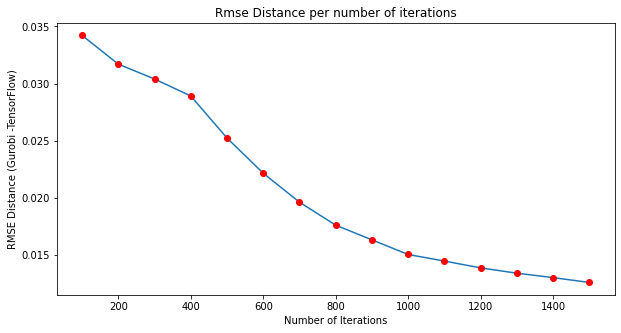

N_ITER        RMSE_DISTANCE
100           0.03421755825807711
200           0.031698422355158774
300           0.03040244003192218
400           0.02891431911258912
500           0.02523920739902568
600           0.022159479153748864
700           0.019629679729930762
800           0.017618773126059945
900           0.01633392374538825
1000          0.015053214410693584
1100          0.014479697158634968
1200          0.013882401283588811
1300          0.013416931448107582
1400          0.013030998969340318
1500          0.01260861554912666


In [5]:
path = "../../../log/Prove-5/Setosa/c1_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


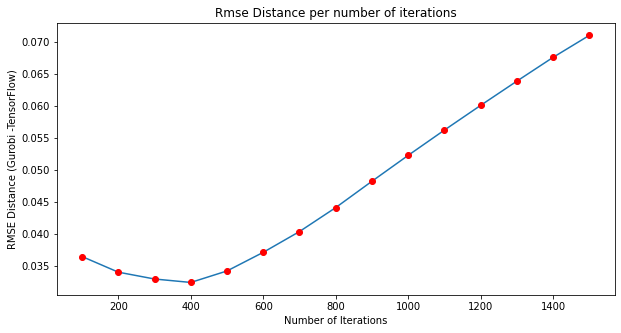

N_ITER        RMSE_DISTANCE
100           0.03645600624940793
200           0.034017199798483576
300           0.03294877722335864
400           0.03241254287898547
500           0.034205746894198585
600           0.037111368023906244
700           0.040353866471537346
800           0.04409284935337408
900           0.04820312501817426
1000          0.05224548997551901
1100          0.056190984957556214
1200          0.06004623529375276
1300          0.063830383127082
1400          0.06754511175517407
1500          0.07097694594130388


In [6]:
path = "../../../log/Prove-5/Setosa/c1_sigma01_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

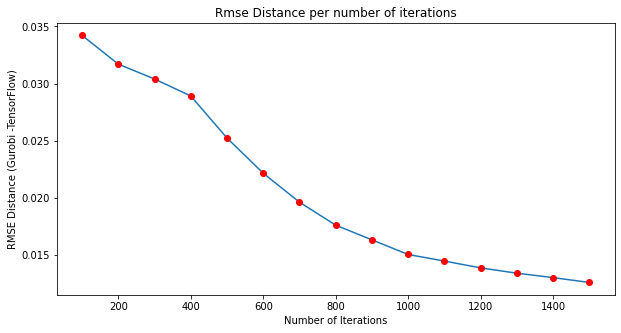

N_ITER        RMSE_DISTANCE
100           0.03421755825807711
200           0.031698422355158774
300           0.03040244003192218
400           0.02891431911258912
500           0.02523920739902568
600           0.022159479153748864
700           0.019629679729930762
800           0.017618773126059945
900           0.01633392374538825
1000          0.015053214410693584
1100          0.014479697158634968
1200          0.013882401283588811
1300          0.013416931448107582
1400          0.013030998969340318
1500          0.01260861554912666


In [7]:
path = "../../../log/Prove-5/Setosa/c1_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

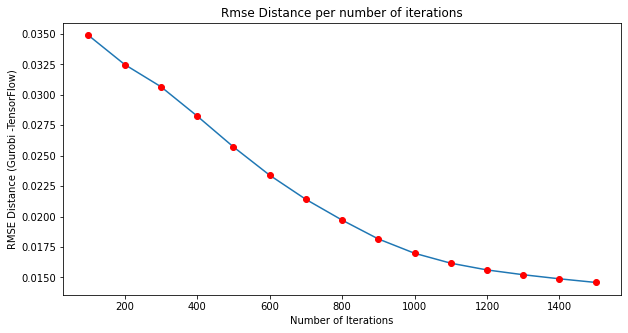

N_ITER        RMSE_DISTANCE
100           0.034885964084251694
200           0.03249107180559528
300           0.03066931686827867
400           0.028260685888392804
500           0.025727696980554535
600           0.023403716768720894
700           0.021416894597207345
800           0.019712553338246643
900           0.018164206095881597
1000          0.016988610041101825
1100          0.016172731890214977
1200          0.015618399950788944
1300          0.01522495435731352
1400          0.01488929391872331
1500          0.014591290894725977


In [8]:
path = "../../../log/Prove-5/Setosa/c1_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


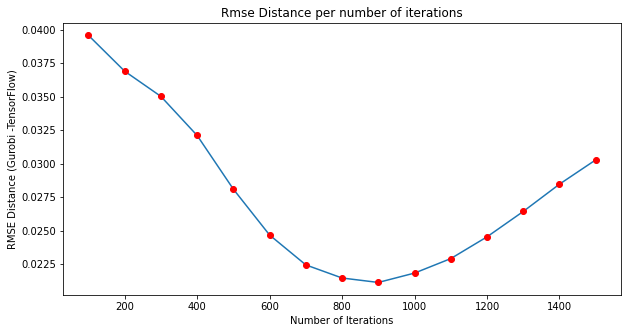

N_ITER        RMSE_DISTANCE
100           0.03958529392375744
200           0.03690954827321534
300           0.03502815265609704
400           0.032111761457812214
500           0.028103682064417494
600           0.024680433006399504
700           0.022451249434778296
800           0.02147376952248771
900           0.021142238159681755
1000          0.021841884757523616
1100          0.0229222088379688
1200          0.024545935732119748
1300          0.02644059531519536
1400          0.028478194899426195
1500          0.03029118894557379


In [9]:
path = "../../../log/Prove-5/Setosa/c1_sigma025_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

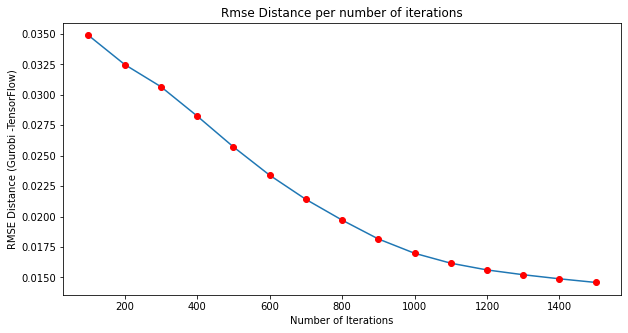

N_ITER        RMSE_DISTANCE
100           0.034885964084251694
200           0.03249107180559528
300           0.03066931686827867
400           0.028260685888392804
500           0.025727696980554535
600           0.023403716768720894
700           0.021416894597207345
800           0.019712553338246643
900           0.018164206095881597
1000          0.016988610041101825
1100          0.016172731890214977
1200          0.015618399950788944
1300          0.01522495435731352
1400          0.01488929391872331
1500          0.014591290894725977


In [10]:
path = "../../../log/Prove-5/Setosa/c1_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

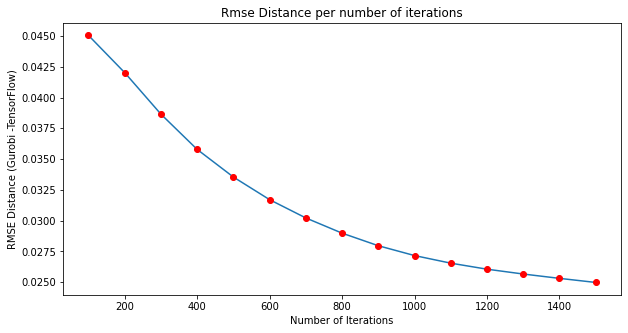

N_ITER        RMSE_DISTANCE
100           0.04504569166432378
200           0.04202107675732912
300           0.03865095909090902
400           0.03578796501873391
500           0.03354456972137913
600           0.03170678680376736
700           0.030220981242566232
800           0.028987607048416044
900           0.027966657253556328
1000          0.027168207633577423
1100          0.02655091324831343
1200          0.026061966701500756
1300          0.025668983013862643
1400          0.02531732371080006
1500          0.024985818414707407


In [11]:
path = "../../../log/Prove-5/Setosa/c1_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


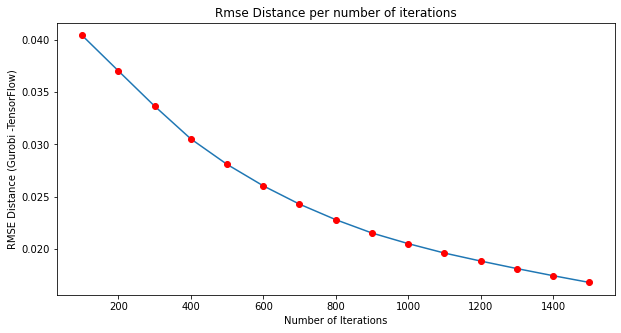

N_ITER        RMSE_DISTANCE
100           0.04041214143335272
200           0.03702656030654044
300           0.03366009662032823
400           0.03052721577040314
500           0.028091482000294103
600           0.026039199033976217
700           0.02428868881792389
800           0.02280698397021258
900           0.021531760988176354
1000          0.02051744012607203
1100          0.019617314346716035
1200          0.018853625387500166
1300          0.0181350383923751
1400          0.01745467401500841
1500          0.01680913911350922


In [12]:
path = "../../../log/Prove-5/Setosa/c1_sigma05_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

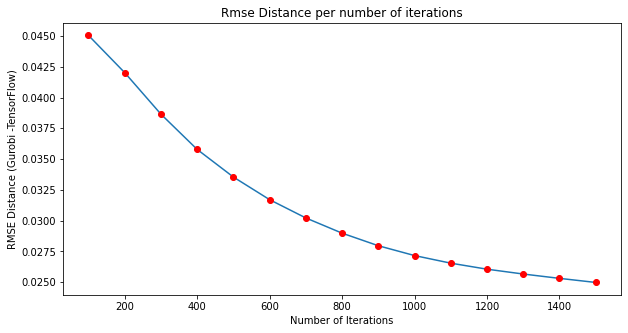

N_ITER        RMSE_DISTANCE
100           0.04504569166432378
200           0.04202107675732912
300           0.03865095909090902
400           0.03578796501873391
500           0.03354456972137913
600           0.03170678680376736
700           0.030220981242566232
800           0.028987607048416044
900           0.027966657253556328
1000          0.027168207633577423
1100          0.02655091324831343
1200          0.026061966701500756
1300          0.025668983013862643
1400          0.02531732371080006
1500          0.024985818414707407


In [13]:
path = "../../../log/Prove-5/Setosa/c1_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

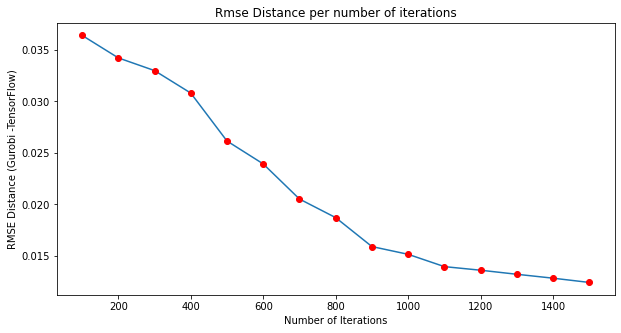

N_ITER        RMSE_DISTANCE
100           0.03639928551967263
200           0.034213897366460716
300           0.03298174549208452
400           0.030801920407807992
500           0.02615174623827901
600           0.023930077756050203
700           0.020525620609709624
800           0.018720505474374538
900           0.015914680571893294
1000          0.015162852059412467
1100          0.013969115345180503
1200          0.013620730919143993
1300          0.013227088711772235
1400          0.012847897251717536
1500          0.012435094486817382


In [14]:
path = "../../../log/Prove-5/Setosa/c75_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


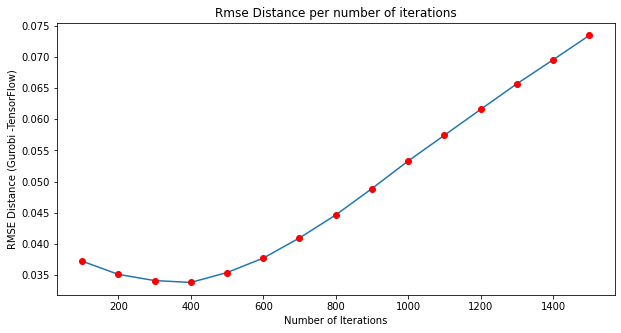

N_ITER        RMSE_DISTANCE
100           0.037241557545808844
200           0.035114954594379647
300           0.034124584851468485
400           0.033820526998634116
500           0.035407045251301554
600           0.037720469862896275
700           0.04095529460419239
800           0.04464311757670565
900           0.04887779611457536
1000          0.053303112819219296
1100          0.05742738271433165
1200          0.06157427867827517
1300          0.0656806910146645
1400          0.06953390968789194
1500          0.07345337196162645


In [15]:
path = "../../../log/Prove-5/Setosa/c75_sigma01_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

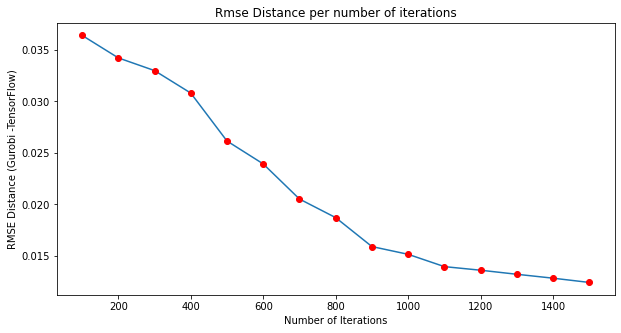

N_ITER        RMSE_DISTANCE
100           0.03639928551967263
200           0.034213897366460716
300           0.03298174549208452
400           0.030801920407807992
500           0.02615174623827901
600           0.023930077756050203
700           0.020525620609709624
800           0.018720505474374538
900           0.015914680571893294
1000          0.015162852059412467
1100          0.013969115345180503
1200          0.013620730919143993
1300          0.013227088711772235
1400          0.012847897251717536
1500          0.012435094486817382


In [16]:
path = "../../../log/Prove-5/Setosa/c75_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

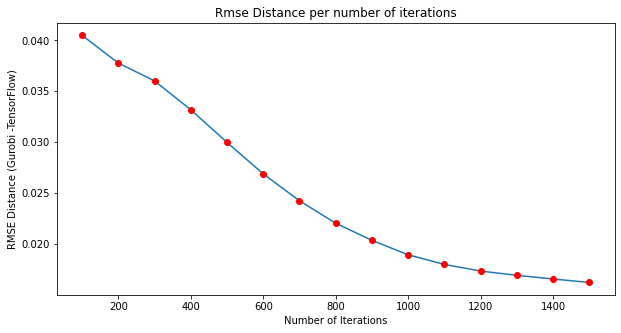

N_ITER        RMSE_DISTANCE
100           0.040486981801277945
200           0.03777095040280782
300           0.03601618924051644
400           0.03318963735814253
500           0.029986688157428398
600           0.02689375846895201
700           0.02425855008011574
800           0.02205524549937064
900           0.020372196529262972
1000          0.018957359571434792
1100          0.018010032773586072
1200          0.017360545591343486
1300          0.016941475324302305
1400          0.016580999034468483
1500          0.016242815134456513


In [17]:
path = "../../../log/Prove-5/Setosa/c75_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


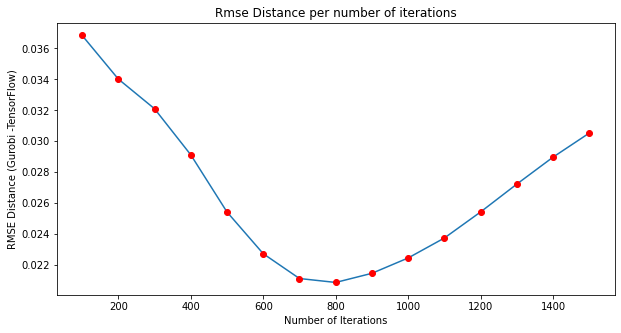

N_ITER        RMSE_DISTANCE
100           0.03684849804592639
200           0.034023545666824126
300           0.032100257555699056
400           0.02912160693593648
500           0.02542202961189884
600           0.022723880594530187
700           0.021118591434251772
800           0.020865048734752745
900           0.02145642875138538
1000          0.022449197071692215
1100          0.023740185998523688
1200          0.02542677551987784
1300          0.027229184793806486
1400          0.028972474728279622
1500          0.03053064939614822


In [18]:
path = "../../../log/Prove-5/Setosa/c75_sigma025_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

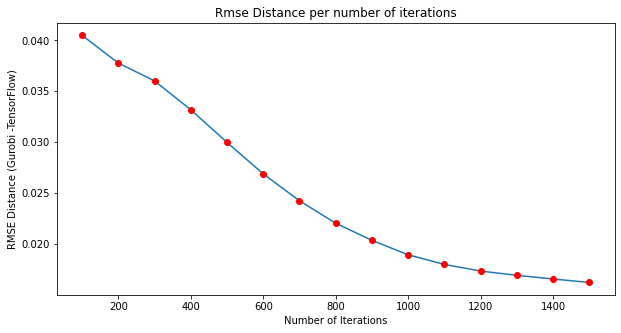

N_ITER        RMSE_DISTANCE
100           0.040486981801277945
200           0.03777095040280782
300           0.03601618924051644
400           0.03318963735814253
500           0.029986688157428398
600           0.02689375846895201
700           0.02425855008011574
800           0.02205524549937064
900           0.020372196529262972
1000          0.018957359571434792
1100          0.018010032773586072
1200          0.017360545591343486
1300          0.016941475324302305
1400          0.016580999034468483
1500          0.016242815134456513


In [19]:
path = "../../../log/Prove-5/Setosa/c75_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

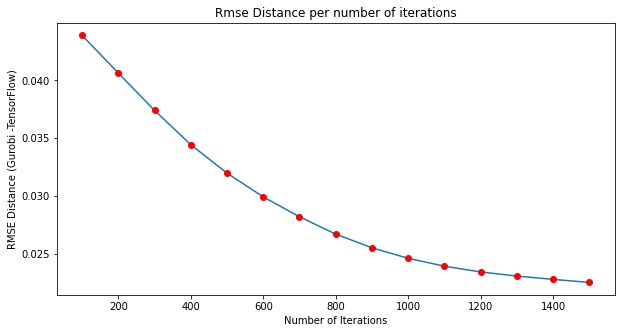

N_ITER        RMSE_DISTANCE
100           0.04388166307602625
200           0.040628605340027664
300           0.03740367186256105
400           0.03444679771307449
500           0.03198813098402756
600           0.029941059359382148
700           0.028220966955430103
800           0.026724925789198294
900           0.025541927581560372
1000          0.024635901795816335
1100          0.023953675193587834
1200          0.0234574727531747
1300          0.023102664359682917
1400          0.022815669592731538
1500          0.02255155798939115


In [20]:
path = "../../../log/Prove-5/Setosa/c75_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


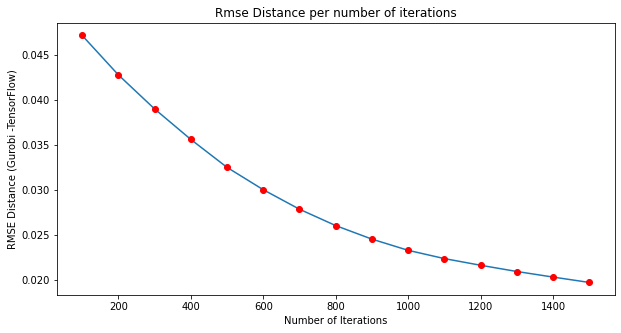

N_ITER        RMSE_DISTANCE
100           0.04717689742137586
200           0.04278518001025857
300           0.03899409733569675
400           0.03559979156825316
500           0.03248835626414471
600           0.0299993341424562
700           0.027828182816217916
800           0.02600544690179651
900           0.024498522300827684
1000          0.023251918590392096
1100          0.02233229824142512
1200          0.02158967327277006
1300          0.020896346023978433
1400          0.020275413432453336
1500          0.019678444448380926


In [21]:
path = "../../../log/Prove-5/Setosa/c75_sigma05_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

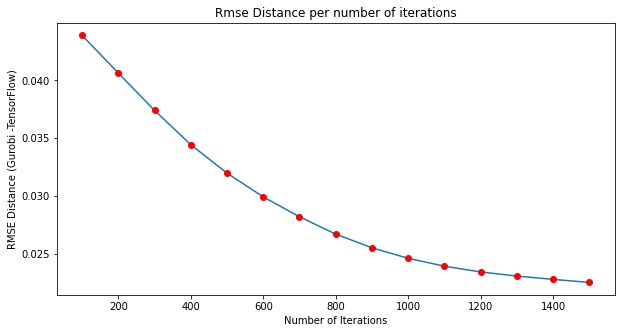

N_ITER        RMSE_DISTANCE
100           0.04388166307602625
200           0.040628605340027664
300           0.03740367186256105
400           0.03444679771307449
500           0.03198813098402756
600           0.029941059359382148
700           0.028220966955430103
800           0.026724925789198294
900           0.025541927581560372
1000          0.024635901795816335
1100          0.023953675193587834
1200          0.0234574727531747
1300          0.023102664359682917
1400          0.022815669592731538
1500          0.02255155798939115


In [22]:
path = "../../../log/Prove-5/Setosa/c75_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

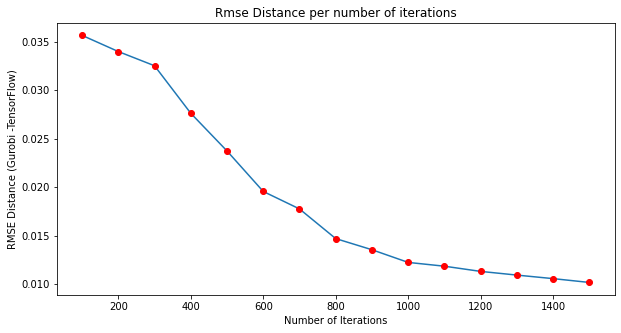

N_ITER        RMSE_DISTANCE
100           0.03564296808109191
200           0.0339750570651108
300           0.0325091886917726
400           0.027612026766047484
500           0.023725878850819455
600           0.019550491618257233
700           0.017750315637359144
800           0.01469085306106951
900           0.01354211596460451
1000          0.01223533002357435
1100          0.011844199630870723
1200          0.011308217351963027
1300          0.010927805209642837
1400          0.010562832650585847
1500          0.010169449188903258


In [23]:
path = "../../../log/Prove-5/Setosa/c200_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


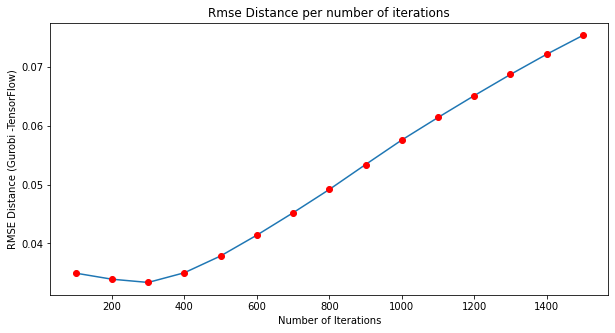

N_ITER        RMSE_DISTANCE
100           0.03492941941941644
200           0.03389813604307666
300           0.03334689338556475
400           0.034997427061357445
500           0.037855858848090534
600           0.04139831893596377
700           0.04520666922966181
800           0.04917387769703281
900           0.05341379072689479
1000          0.05758894760119407
1100          0.06142166150176239
1200          0.06514505186741426
1300          0.06874766568739436
1400          0.0721864280740776
1500          0.07539896134775033


In [24]:
path = "../../../log/Prove-5/Setosa/c200_sigma01_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

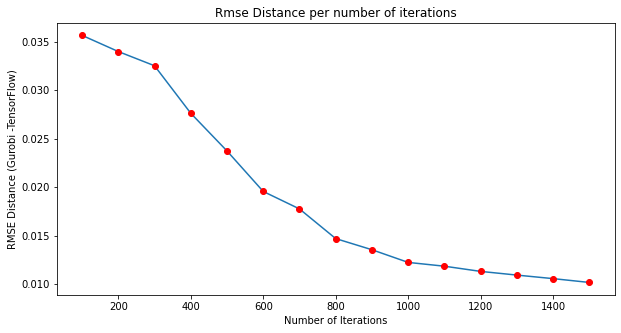

N_ITER        RMSE_DISTANCE
100           0.03564296808109191
200           0.0339750570651108
300           0.0325091886917726
400           0.027612026766047484
500           0.023725878850819455
600           0.019550491618257233
700           0.017750315637359144
800           0.01469085306106951
900           0.01354211596460451
1000          0.01223533002357435
1100          0.011844199630870723
1200          0.011308217351963027
1300          0.010927805209642837
1400          0.010562832650585847
1500          0.010169449188903258


In [25]:
path = "../../../log/Prove-5/Setosa/c200_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

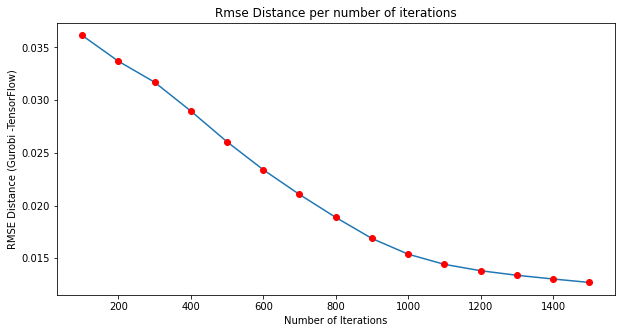

N_ITER        RMSE_DISTANCE
100           0.03614948348637049
200           0.03370048928958625
300           0.03170669003548301
400           0.028972364917348954
500           0.02605252658420336
600           0.0233993966034894
700           0.0210513749930458
800           0.01887744166379573
900           0.01687258870670648
1000          0.015384593980668347
1100          0.014418378281871006
1200          0.013814541615675984
1300          0.013381613179428776
1400          0.01302856076390905
1500          0.01270153324821149


In [26]:
path = "../../../log/Prove-5/Setosa/c200_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


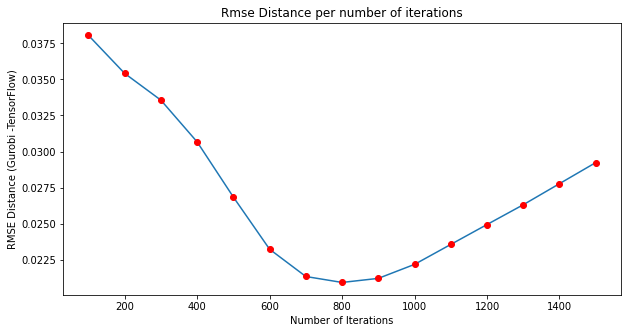

N_ITER        RMSE_DISTANCE
100           0.03805273294379368
200           0.03541554244029347
300           0.03356236271629925
400           0.030670084536435098
500           0.026847966050348993
600           0.023233920900059088
700           0.021344968606240817
800           0.020933030202234283
900           0.021215191356622594
1000          0.022184795985837474
1100          0.02356691386900264
1200          0.02494566791738462
1300          0.026315767825733843
1400          0.027777460338655066
1500          0.029236590939087852


In [27]:
path = "../../../log/Prove-5/Setosa/c200_sigma025_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

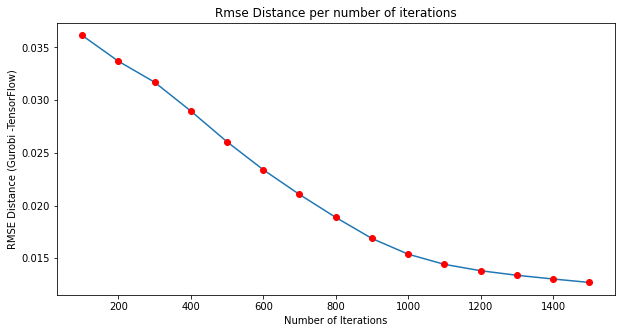

N_ITER        RMSE_DISTANCE
100           0.03614948348637049
200           0.03370048928958625
300           0.03170669003548301
400           0.028972364917348954
500           0.02605252658420336
600           0.0233993966034894
700           0.0210513749930458
800           0.01887744166379573
900           0.01687258870670648
1000          0.015384593980668347
1100          0.014418378281871006
1200          0.013814541615675984
1300          0.013381613179428776
1400          0.01302856076390905
1500          0.01270153324821149


In [28]:
path = "../../../log/Prove-5/Setosa/c200_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

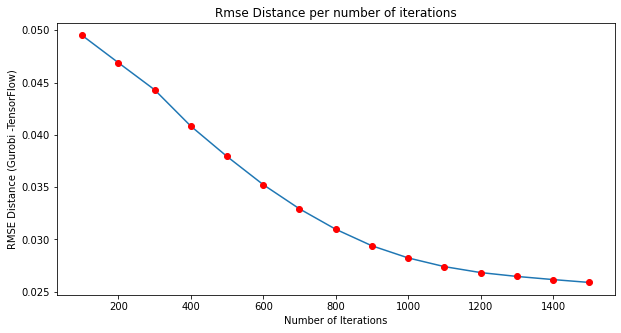

N_ITER        RMSE_DISTANCE
100           0.049507610558944544
200           0.046897694083644484
300           0.0443108808564946
400           0.04083505561477269
500           0.037931666738477386
600           0.03523688842630196
700           0.03292504211714239
800           0.030973246753943178
900           0.029391695531111015
1000          0.028231810167537234
1100          0.027400603819563357
1200          0.026832183269774674
1300          0.026462952484321144
1400          0.026162737573024484
1500          0.025888348651003954


In [29]:
path = "../../../log/Prove-5/Setosa/c200_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


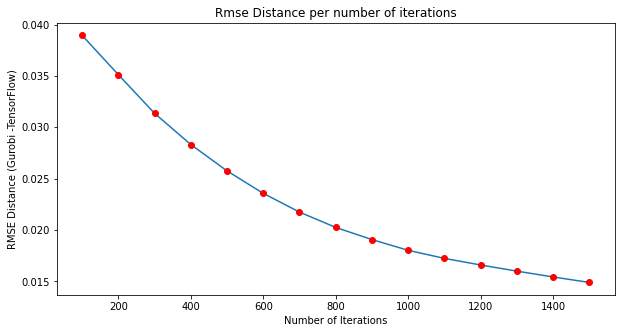

N_ITER        RMSE_DISTANCE
100           0.038944922655117724
200           0.035124429988997626
300           0.0313586846996468
400           0.028322793852115526
500           0.02575900589204908
600           0.023571246760774982
700           0.02174655107480521
800           0.02025580949861265
900           0.01907067319739438
1000          0.018026507677512748
1100          0.017239801686621523
1200          0.01659957356479057
1300          0.01600039207002865
1400          0.015434507398425784
1500          0.014899396315045822


In [30]:
path = "../../../log/Prove-5/Setosa/c200_sigma05_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

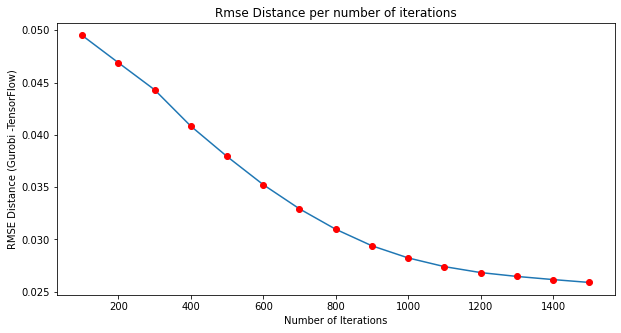

N_ITER        RMSE_DISTANCE
100           0.049507610558944544
200           0.046897694083644484
300           0.0443108808564946
400           0.04083505561477269
500           0.037931666738477386
600           0.03523688842630196
700           0.03292504211714239
800           0.030973246753943178
900           0.029391695531111015
1000          0.028231810167537234
1100          0.027400603819563357
1200          0.026832183269774674
1300          0.026462952484321144
1400          0.026162737573024484
1500          0.025888348651003954


In [31]:
path = "../../../log/Prove-5/Setosa/c200_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)